In [3]:
import pandas as pd
# Load the dataset from the CSV file
df = pd.read_csv('bollywood.csv')

In [2]:
# 1. How many records are present in the dataset? Print the metadata information of the dataset.
# Get the number of records
num_records = len(df)
# Print the metadata information
print(f"Number of Records: {num_records}")
print("Metadata Information:")
print(df.info())


Number of Records: 149
Metadata Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None


In [7]:
# 2. How many movies got released in each genre? Which genre had highest number of releases? Sort
# number of releases in each genre in descending order.
df = pd.read_csv('bollywood.csv')
genre_counts = df['Genre'].value_counts()
print("Number of Movies Released in Each Genre:")
print(genre_counts)
highest_release_genre = genre_counts.idxmax()
highest_release_count = genre_counts.max()
print(f"\nGenre with the Highest Number of Releases: {highest_release_genre}")
print(f"Number of Releases in {highest_release_genre}: {highest_release_count}")
sorted_genre_counts = genre_counts.sort_values(ascending=False)
print("\nSorted Genre Counts in Descending Order:")
print(sorted_genre_counts)


Number of Movies Released in Each Genre:
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

Genre with the Highest Number of Releases: Comedy
Number of Releases in Comedy: 36

Sorted Genre Counts in Descending Order:
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64


In [8]:
#3. How many movies in each genre got released in different release times like long weekend, festive
# season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

df = pd.read_csv('bollywood.csv')

genre_release_cross_tab = pd.crosstab(df['Genre'], df['ReleaseTime'])

print("Cross-Tabulation Between Genre and ReleaseTime:")
print(genre_release_cross_tab)


Cross-Tabulation Between Genre and ReleaseTime:
ReleaseTime  FS  HS  LW   N
Genre                      
 Drama        4   6   1  24
Action        3   3   3  12
Action        0   0   0   3
Comedy        3   5   5  23
Romance       3   3   4  15
Thriller      4   1   1  20
Thriller      0   0   1   2


In [17]:
# 4. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column
# called month from ReleaseDate column.)

df['Release Date'] = pd.to_datetime(df['Release Date'])

df['Release Month'] = df['Release Date'].dt.month

month_counts = df['Release Month'].value_counts()

max_release_month = month_counts.idxmax()

max_release_count = month_counts.max()

print(f"The month with the Maximum Number of Movie Releases: {max_release_month}")
print(f"Number of Movie Releases in {max_release_month}: {max_release_count}")



The month with the Maximum Number of Movie Releases: 1
Number of Movie Releases in 1: 20


In [18]:

# Convert the 'Release Date' column to a datetime data type
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Extract the month from the 'Release Date' and create a new column 'Month'
df['Month'] = df['Release Date'].dt.month

# Print the DataFrame with the new 'Month' column
print(df)


     SlNo Release Date                    MovieName ReleaseTime      Genre  \
0       1   2014-04-18                     2 States          LW    Romance   
1       2   2013-01-04                 Table No. 21           N  Thriller    
2       3   2014-07-18           Amit Sahni Ki List           N     Comedy   
3       4   2013-01-04             Rajdhani Express           N     Drama    
4       5   2014-07-04                 Bobby Jasoos           N     Comedy   
..    ...          ...                          ...         ...        ...   
144   145   2015-02-27           Dum Laga Ke Haisha           N     Comedy   
145   146   2015-03-13                         NH10           N   Thriller   
146   147   2015-03-20  Dilliwali Zaalim Girlfriend           N     Comedy   
147   148   2015-03-20                     Hunterrr           N     Comedy   
148   149   2014-05-23                Kochadaiiyaan          HS     Action   

     Budget  BoxOfficeCollection  YoutubeViews  YoutubeLikes  Y

In [4]:
# 5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with
# budget of 25 crore or more?

df['Release Date'] = pd.to_datetime(df['Release Date'])

high_budget_movies = df[df['Budget'] >= 25]

high_budget_movies['Release Month'] = high_budget_movies['Release Date'].dt.month

month_counts = high_budget_movies['Release Month'].value_counts()
max_release_month = month_counts.idxmax()
max_release_count = month_counts.max()

print(f"The month with the Most Releases of High-Budget Movies: {max_release_month}")
print(f"Number of High-Budget Movie Releases in {max_release_month}: {max_release_count}")


The month with the Most Releases of High-Budget Movies: 2
Number of High-Budget Movie Releases in 2: 9


C:\Users\Khalid Hassan\AppData\Local\Temp\ipykernel_5956\2618439362.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_budget_movies['Release Month'] = high_budget_movies['Release Date'].dt.month


In [6]:
# 6. Which are the top 10 movies with maximum return on investment (ROI)?
#Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']

top_10_movies_by_roi = df.sort_values(by='ROI', ascending=False).head(10)

print("Top 10 Movies with Maximum Return on Investment (ROI):")
print(top_10_movies_by_roi[['MovieName', 'ROI']])

# Calculate ROI (Return on Investment) for each movie and add it as a new column
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']

print(df[['MovieName', 'BoxOfficeCollection', 'Budget', 'ROI']])


Top 10 Movies with Maximum Return on Investment (ROI):
                     MovieName       ROI
64                  Aashiqui 2  8.166667
89                          PK  7.647059
132                Grand Masti  7.514286
135               The Lunchbox  7.500000
87                      Fukrey  6.240000
58                    Mary Kom  5.933333
128                     Shahid  5.666667
37   Humpty Sharma Ki Dulhania  5.500000
101         Bhaag Milkha Bhaag  4.466667
115            Chennai Express  4.266667
                       MovieName  BoxOfficeCollection  Budget       ROI
0                       2 States               104.00      36  1.888889
1                   Table No. 21                12.00      10  0.200000
2             Amit Sahni Ki List                 4.00      10 -0.600000
3               Rajdhani Express                 0.35       7 -0.950000
4                   Bobby Jasoos                10.80      18 -0.400000
..                           ...                  ...     ... 

In [15]:
# 7. Do the movies have higher ROI if they get released on festive seasons or long weekend? 
#Calculate the average ROI for different release times.

df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
average_roi_by_release_time = df.groupby('ReleaseTime')['ROI'].mean()
print("Average ROI by Release Time:")
print(average_roi_by_release_time)

festive_season_roi = average_roi_by_release_time['FS']
long_weekend_roi = average_roi_by_release_time['LW']
normal_roi = average_roi_by_release_time['N']

# Compare ROI for festive seasons, long weekends, and normal releases
if festive_season_roi > normal_roi:
    print("Movies released during Festive Seasons have a higher ROI.")
else:
    print("Movies released during Normal times have a higher ROI.")

if long_weekend_roi > normal_roi:
    print("Movies released during Long Weekends have a higher ROI.")
else:
    print("Movies released during Normal times have a higher ROI.")

#Calculate the average ROI for different release times.
  
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
average_roi_by_release_time = df.groupby('ReleaseTime')['ROI'].mean()
print("Average ROI for Different Release Times:")
print(average_roi_by_release_time)



Average ROI by Release Time:
ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64
Movies released during Festive Seasons have a higher ROI.
Movies released during Long Weekends have a higher ROI.
Average ROI for Different Release Times:
ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64


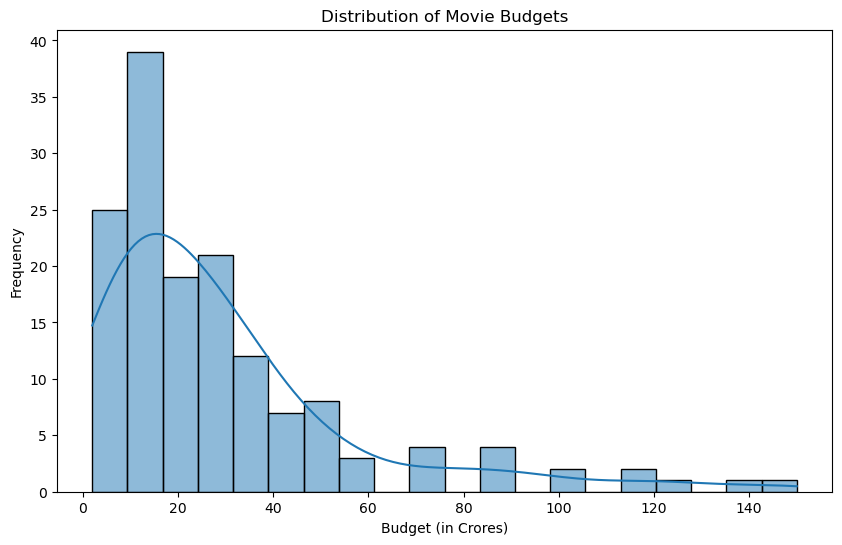

In [17]:
# 8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot
# to conclude if the most movies are high or low budgeted movies.
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for movie budgets
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Budget', bins=20, kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget (in Crores)')
plt.ylabel('Frequency')
plt.show()


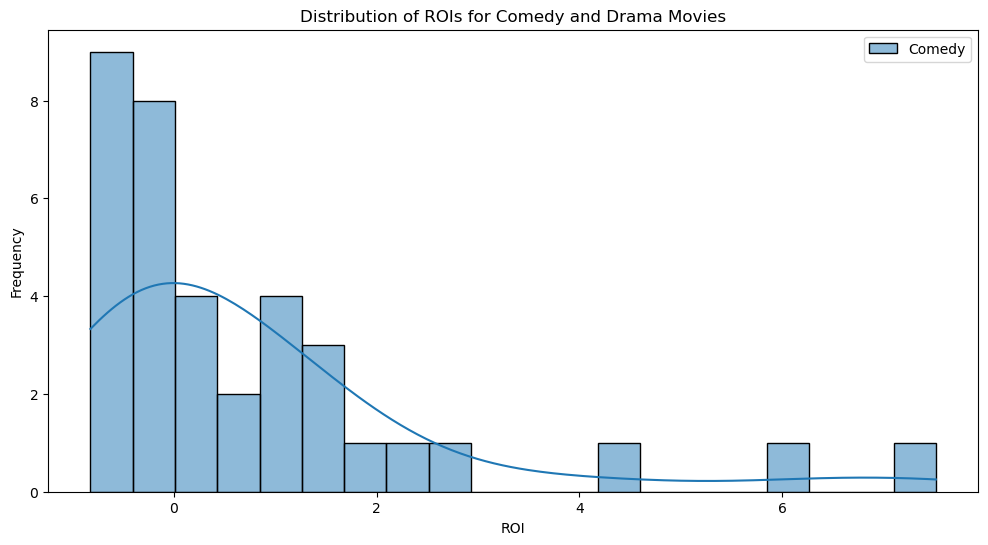

In [19]:
#9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?

df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
comedy_movies = df[df['Genre'] == 'Comedy']
drama_movies = df[df['Genre'] == 'Drama']
# Create distribution plots for ROI of Comedy and Drama movies
plt.figure(figsize=(12, 6))
sns.histplot(data=comedy_movies, x='ROI', label='Comedy', bins=20, kde=True)
sns.histplot(data=drama_movies, x='ROI', label='Drama', bins=20, kde=True)
plt.title('Distribution of ROIs for Comedy and Drama Movies')
plt.xlabel('ROI')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [21]:
# 10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?
correlation = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])

# Determine if the correlation is positive, negative, or close to zero
if correlation > 0:
    correlation_type = 'positive'
elif correlation < 0:
    correlation_type = 'negative'
else:
    correlation_type = 'no'
print(f"Correlation Coefficient: {correlation}")
print(f"Correlation is {correlation_type}.")


Correlation Coefficient: 0.6825165877731297
Correlation is positive.


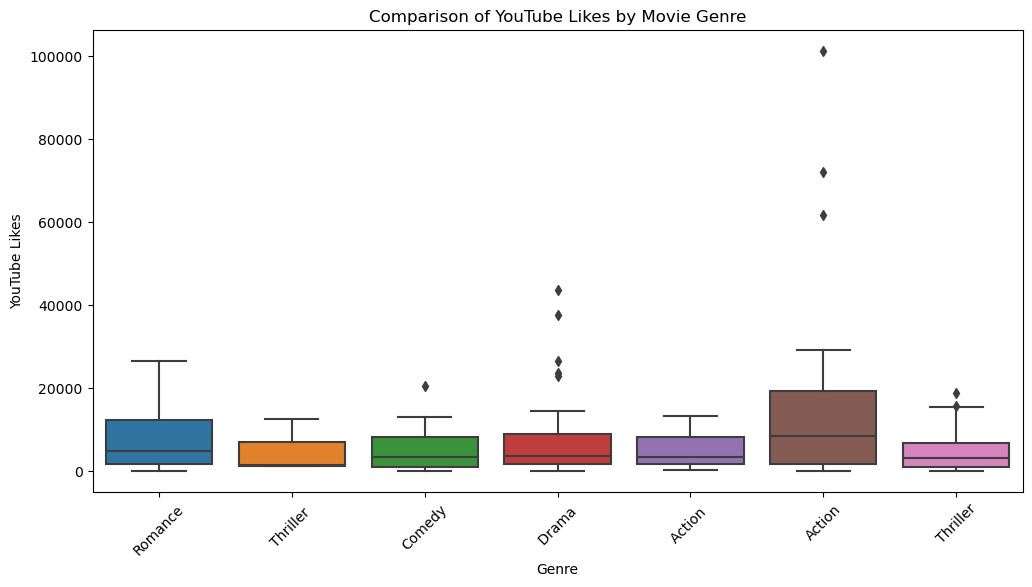

In [22]:
# 11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.
# Create a boxplot to compare YouTube likes by genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Genre', y='YoutubeLikes')
plt.title('Comparison of YouTube Likes by Movie Genre')
plt.xlabel('Genre')
plt.ylabel('YouTube Likes')
plt.xticks(rotation=45)  # Rotate genre labels for better readability
plt.show()


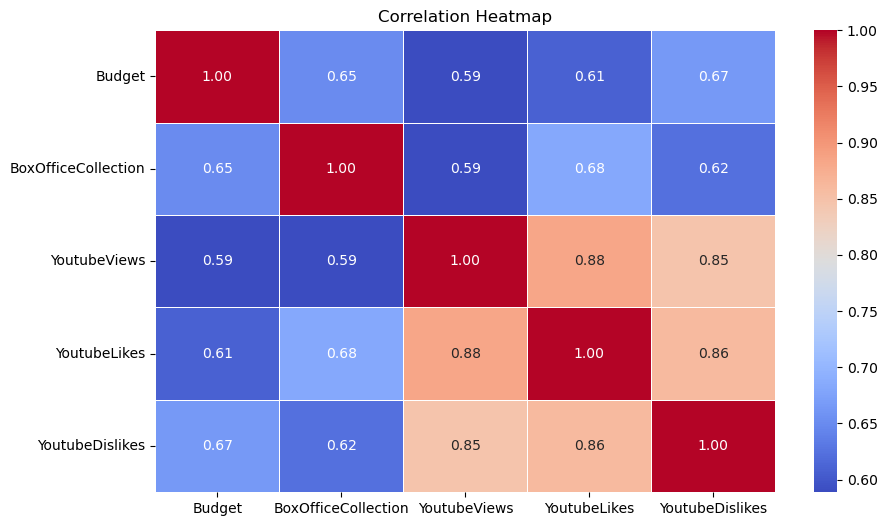

In [23]:
# 12. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes,
# YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

# Select the columns of interest for correlation analysis
columns_of_interest = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
subset_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [9]:

# 13. How many records are present in the dataset? Print the metadata information of the dataset.

# Load the dataset from the provided URL (assuming it's saved as 'SAheart.data' in the current directory)
url = "http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data"
df = pd.read_csv(url, sep=",")

# Get the number of records
num_records = len(df)

# Print the metadata information
print(f"Number of Records: {num_records}")
print("Metadata Information:")
print(df.info())


Number of Records: 462
Metadata Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB
None


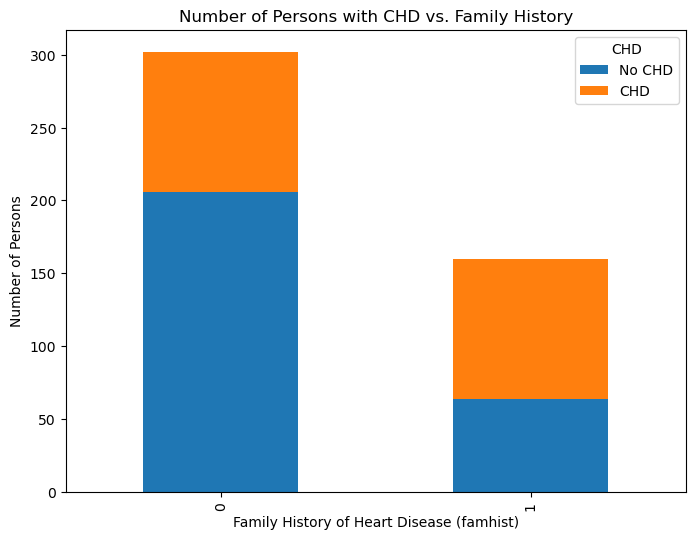

In [12]:
 # 14. Draw a bar plot to show the number of persons having CHD or not in comparison to they having
# family history of the disease or not.
import pandas as pd
import matplotlib.pyplot as plt

chd_famhist_counts = df.groupby(['chd', 'famhist']).size().unstack()
ax = chd_famhist_counts.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Family History of Heart Disease (famhist)')
plt.ylabel('Number of Persons')
plt.title('Number of Persons with CHD vs. Family History')
plt.legend(title='CHD', labels=['No CHD', 'CHD'], loc='upper right')
plt.show()


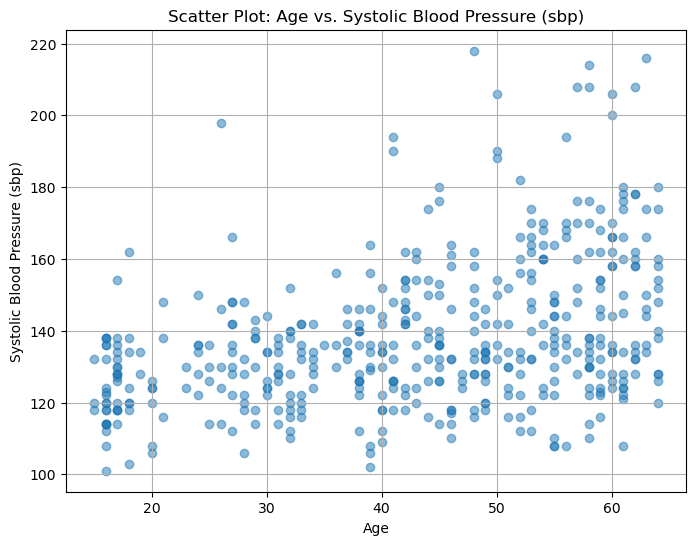

In [13]:
# 15. Does age have any correlation with sbp? Choose appropriate plot to show the relationship.
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['sbp'], alpha=0.5)
plt.title('Scatter Plot: Age vs. Systolic Blood Pressure (sbp)')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure (sbp)')
plt.grid(True)
# Show the plot
plt.show()


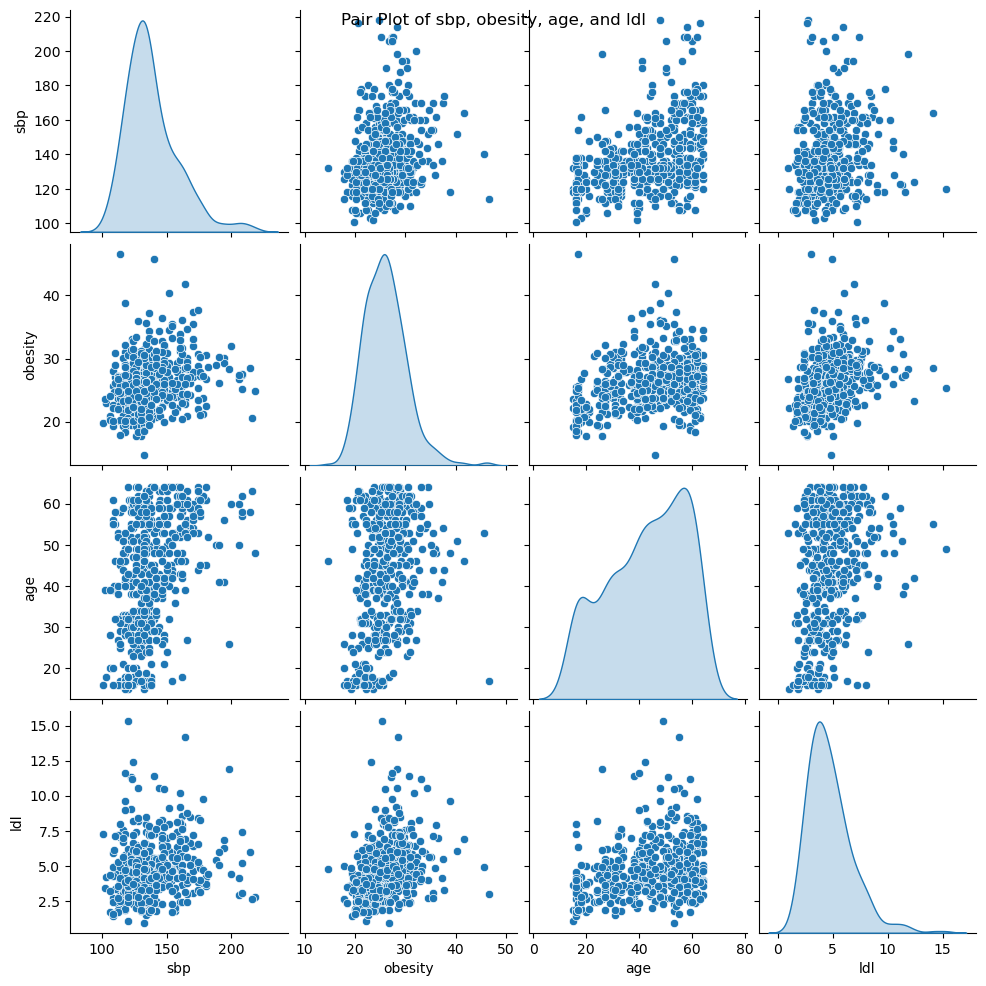

In [16]:
#17. How are the parameters sbp, obesity, age and ldl correlated? Choose the right plot to show the
# relationships.
import seaborn as sns
selected_columns = ['sbp', 'obesity', 'age', 'ldl']
sns.pairplot(df[selected_columns], diag_kind='kde', markers='o', hue=None)
plt.suptitle('Pair Plot of sbp, obesity, age, and ldl')
plt.show()


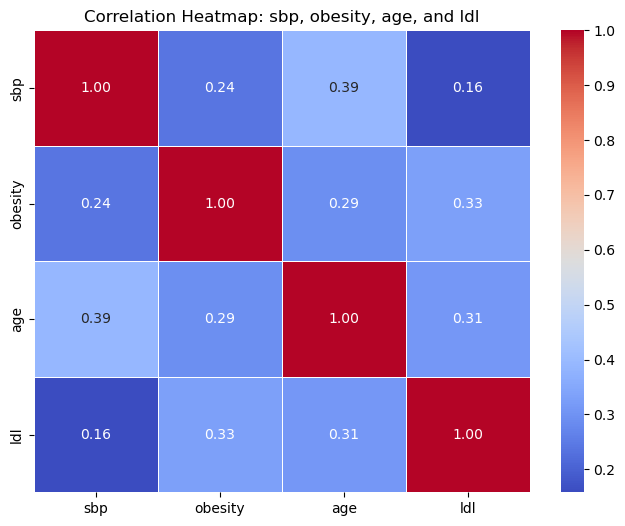

In [18]:
# 17. How are the parameters sbp, obesity, age and ldl correlated? Choose the right plot to show the
 # relationships.

selected_columns = ['sbp', 'obesity', 'age', 'ldl']
correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: sbp, obesity, age, and ldl')
plt.show()


In [20]:
#18. Derive a new column called agegroup from age column where persons falling in different age ranges
#are categorized as below.
#(0–15): young
#(15–35): adults
#(35–55): mid
#(55–): old
# Define a function to categorize age into age groups
def categorize_age(age):
    if age <= 15:
        return 'young'
    elif 15 < age <= 35:
        return 'adults'
    elif 35 < age <= 55:
        return 'mid'
    else:
        return 'old'

df['agegroup'] = df['age'].apply(categorize_age)

print(df[['age', 'agegroup']])


     age agegroup
0     52      mid
1     63      old
2     46      mid
3     58      old
4     49      mid
..   ...      ...
457   58      old
458   52      mid
459   55      mid
460   40      mid
461   46      mid

[462 rows x 2 columns]


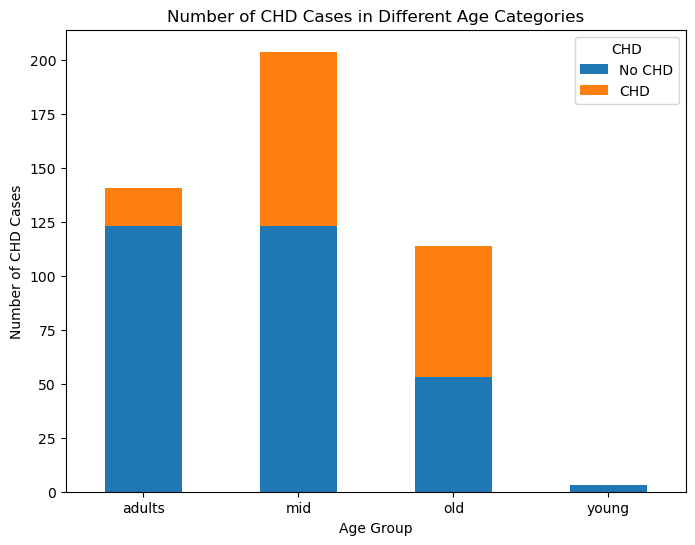

In [21]:
# 19. Find out the number of CHD cases in different age categories. Do a barplot and sort them in the order
# of age groups.

def categorize_age(age):
    if age <= 15:
        return 'young'
    elif 15 < age <= 35:
        return 'adults'
    elif 35 < age <= 55:
        return 'mid'
    else:
        return 'old'
    
df['agegroup'] = df['age'].apply(categorize_age)

chd_age_counts = df.groupby(['agegroup', 'chd']).size().unstack()

ax = chd_age_counts.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of CHD Cases')
plt.title('Number of CHD Cases in Different Age Categories')
plt.xticks(rotation=0)  # Keep age group labels horizontal

# Add a legend
plt.legend(title='CHD', labels=['No CHD', 'CHD'], loc='upper right')

# Show the plot
plt.show()


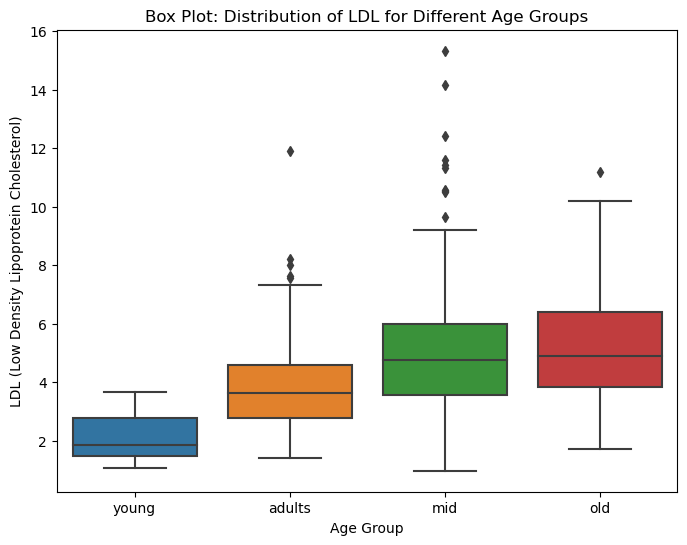

In [24]:
# 20. Draw a box plot to compare distributions of ldl for different age groups.

def categorize_age(age):
    if age <= 15:
        return 'young'
    elif 15 < age <= 35:
        return 'adults'
    elif 35 < age <= 55:
        return 'mid'
    else:
        return 'old'

# Apply the categorization function to create the 'agegroup' column
df['agegroup'] = df['age'].apply(categorize_age)

# Create a box plot to compare distributions of ldl for different age groups
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='agegroup', y='ldl', order=['young', 'adults', 'mid', 'old'])
plt.title('Box Plot: Distribution of LDL for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('LDL (Low Density Lipoprotein Cholesterol)')

# Show the plot
plt.show()
